In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
import numpy as np
from mlxtend.frequent_patterns import association_rules
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers.legacy import Adam
from keras.optimizers.legacy import RMSprop

C:\Python 3.11\Lib\site-packages\tensorflow\python\framework\dtypes.py:35: DeprecationWarning: ml_dtypes.float8_e4m3b11 is deprecated. Use ml_dtypes.float8_e4m3b11fnuz
  from tensorflow.tsl.python.lib.core import pywrap_ml_dtypes


In [3]:
df = pd.read_csv('smoke_detection_iot.csv')


train_set, test_set = train_test_split(df, test_size=0.3, random_state=292752)


X_train = train_set[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
                     'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]',
                     'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
y_train = train_set['Fire Alarm']
X_test = test_set[['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
                     'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]',
                     'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']]
y_test = test_set['Fire Alarm']

In [4]:
# Tworzenie klasyfikatora z mniejszą głębokością drzewa (max_depth=5)
clf_small = DecisionTreeClassifier(max_depth=5)
clf_small.fit(X_train, y_train)
clf_small_predictions = clf_small.predict(X_test)
accuracy_clf_small = accuracy_score(y_test, clf_small_predictions)
confusion_clf_small = confusion_matrix(y_test, clf_small_predictions)

In [5]:
print(f"Dokładność Desicion Tree (mała głębokość): {accuracy_clf_small*100:.5f} %")
print("Confusion Matrix Desicion Tree (mała głębokość):")
print(confusion_clf_small)
print('------------------------------------------')

Dokładność Desicion Tree (mała głębokość): 99.28149 %
Confusion Matrix Desicion Tree (mała głębokość):
[[ 5243   118]
 [   17 13411]]
------------------------------------------


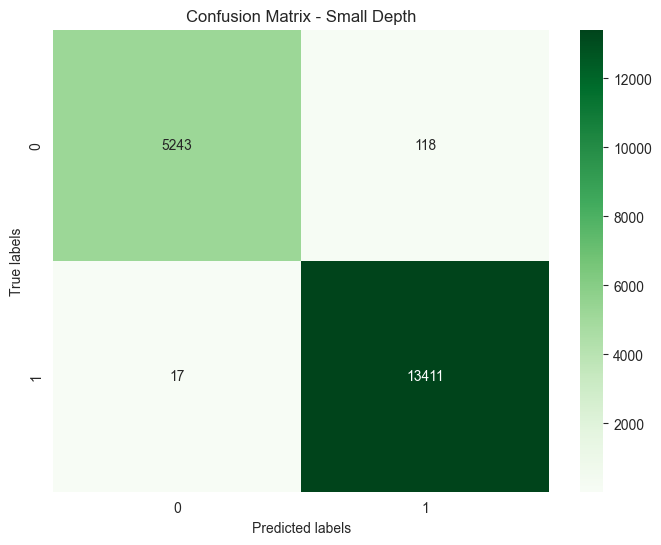

In [6]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_clf_small, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Small Depth')
plt.show()

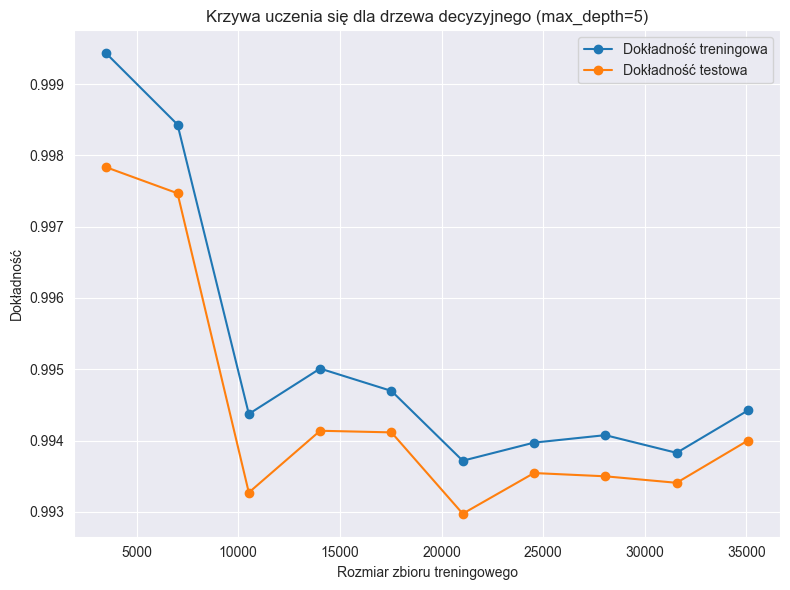

In [7]:
# Inicjalizacja klasyfikatora drzewa decyzyjnego z ograniczoną głębokością
clf_small = DecisionTreeClassifier(max_depth=5)

# Rysowanie krzywej uczenia się dla klasyfikatora drzewa decyzyjnego z ograniczoną głębokością
plt.figure(figsize=(8, 6))

train_sizes, train_scores, test_scores = learning_curve(clf_small, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Dokładność treningowa')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Dokładność testowa')
plt.title('Krzywa uczenia się dla drzewa decyzyjnego (max_depth=5)')
plt.xlabel('Rozmiar zbioru treningowego')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [8]:
# Tworzenie klasyfikatora z większą głębokością drzewa (na przykład max_depth=None - bez ograniczeń)
clf_large = DecisionTreeClassifier(max_depth=None)
clf_large.fit(X_train, y_train)
clf_large_predictions = clf_large.predict(X_test)
accuracy_clf_large = accuracy_score(y_test, clf_large_predictions)
confusion_clf_large = confusion_matrix(y_test, clf_large_predictions)

In [10]:
print(f"Dokładność Desicion Tree (duża głębokość): {accuracy_clf_large*100:.5f} %")
print("Confusion Matrix Desicion Tree (duża głębokość):")
print(confusion_clf_large)
print('------------------------------------------')

Dokładność Desicion Tree (duża głębokość): 99.99468 %
Confusion Matrix Desicion Tree (duża głębokość):
[[ 5361     0]
 [    1 13427]]
------------------------------------------


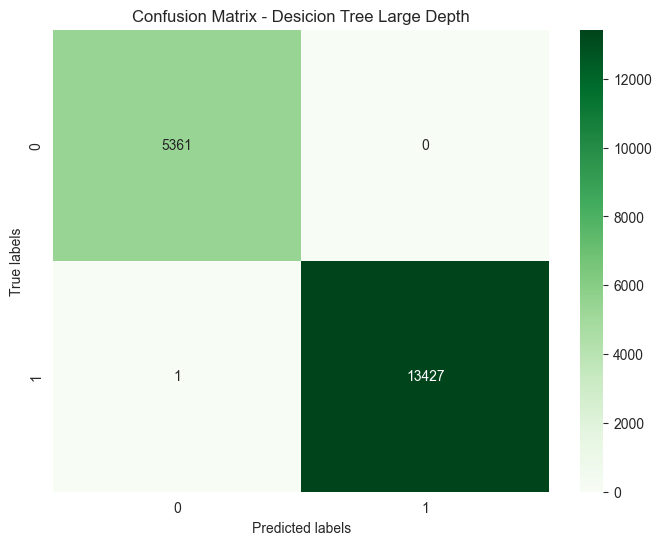

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_clf_large, annot=True, cmap='Greens', fmt='g')

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Desicion Tree Large Depth')
plt.show()

In [12]:
depths = []
accuracies = []
# Eksperymentowanie z różnymi głębokościami drzewa i obliczanie dokładności
for depth in range(1, 21):  # Zakres głębokości od 1 do 20
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    clf_predictions = clf.predict(X_test)
    accuracy_clf = accuracy_score(y_test, clf_predictions)
    depths.append(depth)
    accuracies.append(accuracy_clf)

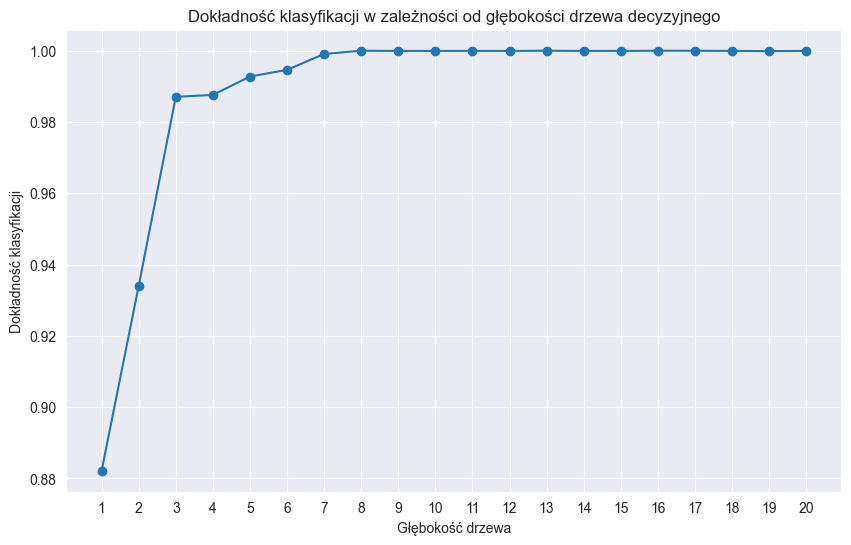

In [13]:
# Tworzenie wykresu
plt.figure(figsize=(10, 6))
plt.plot(depths, accuracies, marker='o', linestyle='-')
plt.title('Dokładność klasyfikacji w zależności od głębokości drzewa decyzyjnego')
plt.xlabel('Głębokość drzewa')
plt.ylabel('Dokładność klasyfikacji')
plt.xticks(np.arange(1, 21, step=1))  # Ustawienie kroków na osi X od 1 do 20
plt.grid(True)
plt.show()

In [14]:
# Klasyfikator Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_predictions = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, nb_predictions)
confusion_nb = confusion_matrix(y_test, nb_predictions)

In [15]:
print(f"Dokładność Naive Bayes: {accuracy_nb*100:.5f} %")
print("Confusion Matrix Naive Bayes:")
print(confusion_nb)
print('------------------------------------------')

Dokładność Naive Bayes: 76.60333 %
Confusion Matrix Naive Bayes:
[[ 1276  4085]
 [  311 13117]]
------------------------------------------


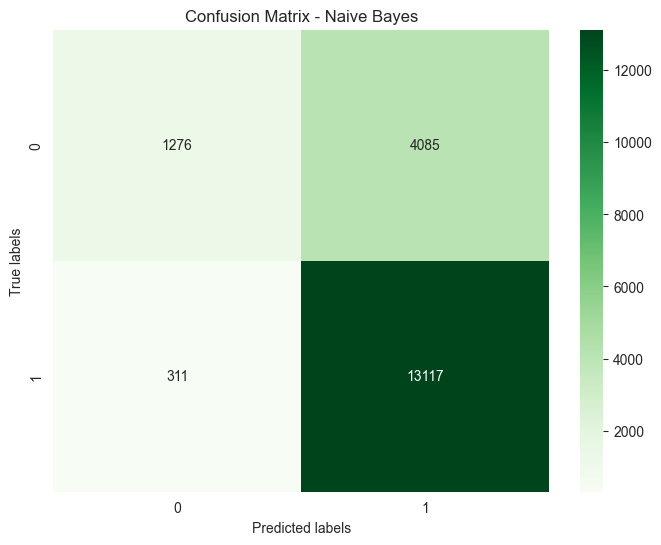

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_nb, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

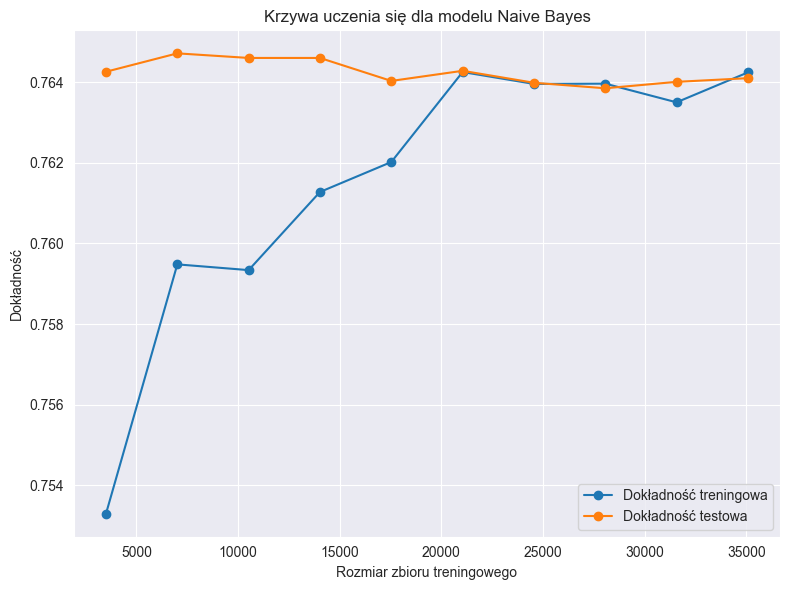

In [17]:
# Inicjalizacja modelu Gaussian Naive Bayes
nb = GaussianNB()

# Rysowanie krzywej uczenia się dla modelu Naive Bayes
plt.figure(figsize=(8, 6))

train_sizes, train_scores, test_scores = learning_curve(nb, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, 'o-', label='Dokładność treningowa')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Dokładność testowa')
plt.title('Krzywa uczenia się dla modelu Naive Bayes')
plt.xlabel('Rozmiar zbioru treningowego')
plt.ylabel('Dokładność')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [9]:
# Klasyfikator k-NN z k=3
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)
knn3_predictions = knn3.predict(X_test)
accuracy_knn3 = accuracy_score(y_test, knn3_predictions)
confusion_knn3 = confusion_matrix(y_test, knn3_predictions)

# Klasyfikator k-NN z k=5
knn5 = KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)
knn5_predictions = knn5.predict(X_test)
accuracy_knn5 = accuracy_score(y_test, knn5_predictions)
confusion_knn5 = confusion_matrix(y_test, knn5_predictions)

# Klasyfikator k-NN z k=11
knn11 = KNeighborsClassifier(n_neighbors=11)
knn11.fit(X_train, y_train)
knn11_predictions = knn11.predict(X_test)
accuracy_knn11 = accuracy_score(y_test, knn11_predictions)
confusion_knn11 = confusion_matrix(y_test, knn11_predictions)

In [11]:
print(f"Dokładność k-NN (k=3): {accuracy_knn3*100:.5f} %")
print("Confusion Matrix k-NN (k=3):")
print(confusion_knn3)
print('------------------------------------------')

print(f"Dokładność k-NN (k=5): {accuracy_knn5*100:.5f} %")
print("Confusion Matrix k-NN (k=3):")
print(confusion_knn5)
print('------------------------------------------')

print(f"Dokładność k-NN (k=11): {accuracy_knn11*100:.5f} %")
print("Confusion Matrix k-NN (k=3):")
print(confusion_knn11)
print('------------------------------------------')

Dokładność k-NN (k=3): 99.96807 %
Confusion Matrix k-NN (k=3):
[[ 5356     5]
 [    1 13427]]
------------------------------------------
Dokładność k-NN (k=5): 99.96274 %
Confusion Matrix k-NN (k=3):
[[ 5356     5]
 [    2 13426]]
------------------------------------------
Dokładność k-NN (k=11): 99.94678 %
Confusion Matrix k-NN (k=3):
[[ 5353     8]
 [    2 13426]]
------------------------------------------


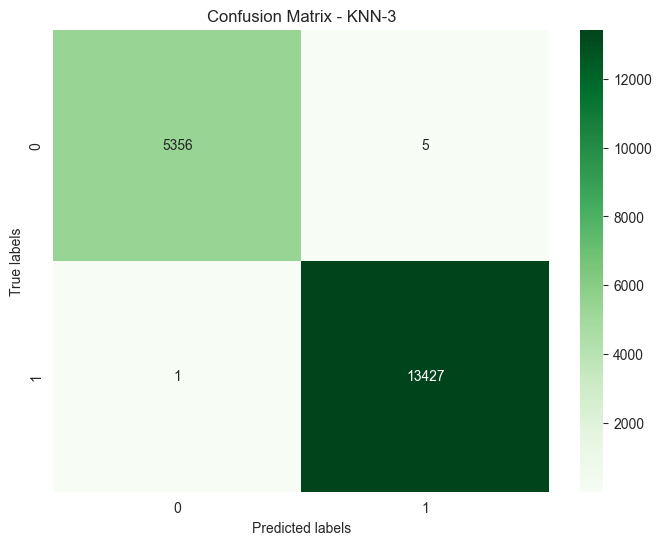

In [20]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn3, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN-3')
plt.show()

In [21]:
print(f"Dokładność k-NN (k=5): {accuracy_knn5*100:.5f} %")
print("Confusion Matrix k-NN (k=5):")
print(confusion_knn5)
print('------------------------------------------')

Dokładność k-NN (k=5): 99.96274 %
Confusion Matrix k-NN (k=5):
[[ 5356     5]
 [    2 13426]]
------------------------------------------


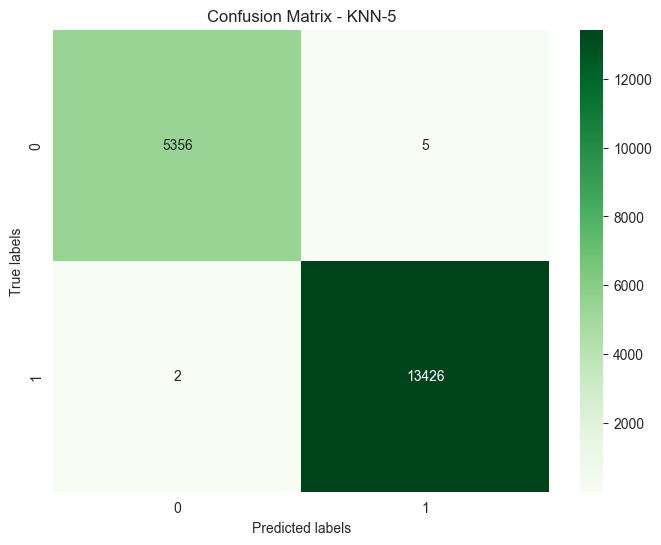

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn5, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN-5')
plt.show()

In [23]:
print(f"Dokładność k-NN (k=11): {accuracy_knn11*100:.5f} %")
print("Confusion Matrix k-NN (k=11):")
print(confusion_knn11)
print('------------------------------------------')

Dokładność k-NN (k=11): 99.94678 %
Confusion Matrix k-NN (k=11):
[[ 5353     8]
 [    2 13426]]
------------------------------------------


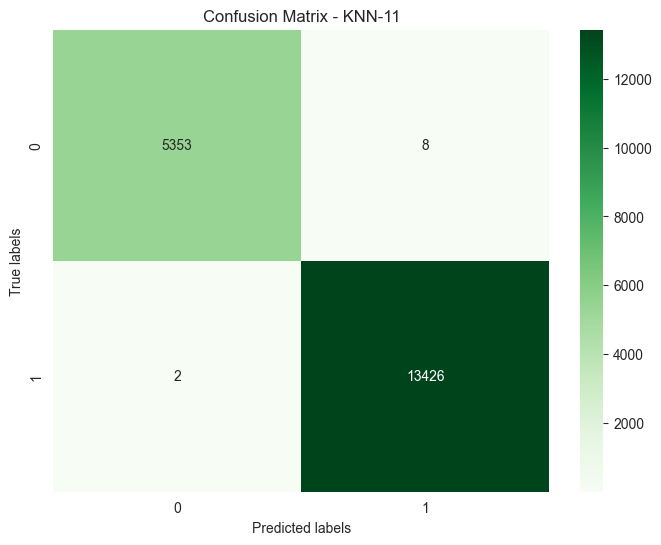

In [24]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_knn11, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN-11')
plt.show()

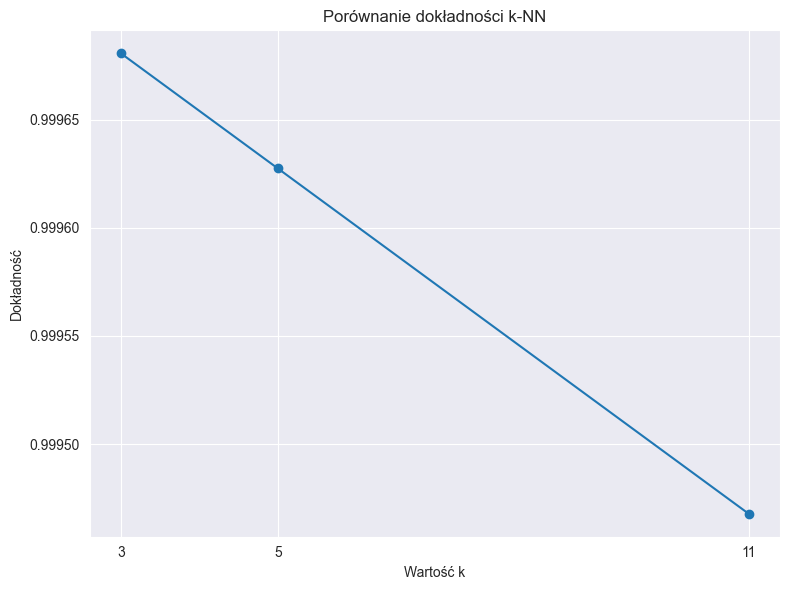

In [25]:
# Wartości dokładności dla różnych k
accuracies = [accuracy_knn3, accuracy_knn5, accuracy_knn11]

# Wartości k
k_values = [3, 5, 11]

# Tworzenie wykresu
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Porównanie dokładności k-NN')
plt.xlabel('Wartość k')
plt.ylabel('Dokładność')
plt.xticks(k_values)
plt.grid(True)
plt.tight_layout()

# Wyświetlenie wykresu
plt.show()

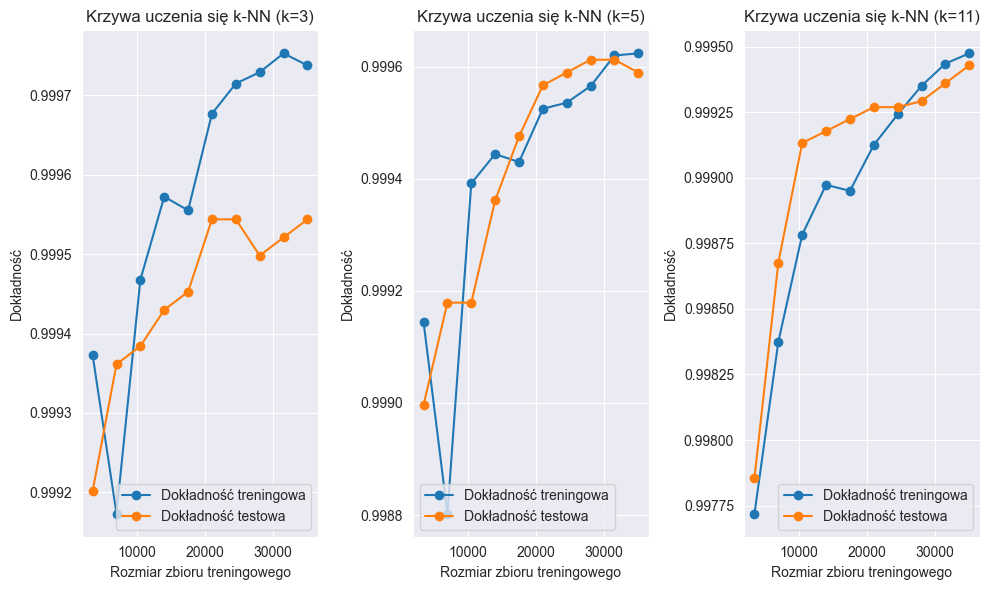

In [26]:
# Definicja klasyfikatorów k-NN z różnymi wartościami k
k_values = [3, 5, 11]
classifiers = [KNeighborsClassifier(n_neighbors=k) for k in k_values]

# Rysowanie krzywej uczenia się dla każdego klasyfikatora
plt.figure(figsize=(10, 6))

for i, clf in enumerate(classifiers, start=1):
    train_sizes, train_scores, test_scores = learning_curve(clf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    
    plt.subplot(1, len(classifiers), i)
    plt.plot(train_sizes, train_scores_mean, 'o-', label='Dokładność treningowa')
    plt.plot(train_sizes, test_scores_mean, 'o-', label='Dokładność testowa')
    plt.title(f'Krzywa uczenia się k-NN (k={k_values[i-1]})')
    plt.xlabel('Rozmiar zbioru treningowego')
    plt.ylabel('Dokładność')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

588/588 [==============================] - 1s 1ms/step
Dokładność: 99.93613 %
Confusion Matrix RMSprop as optimizer:
[[ 5359     2]
 [   10 13418]]
------------------------------------------


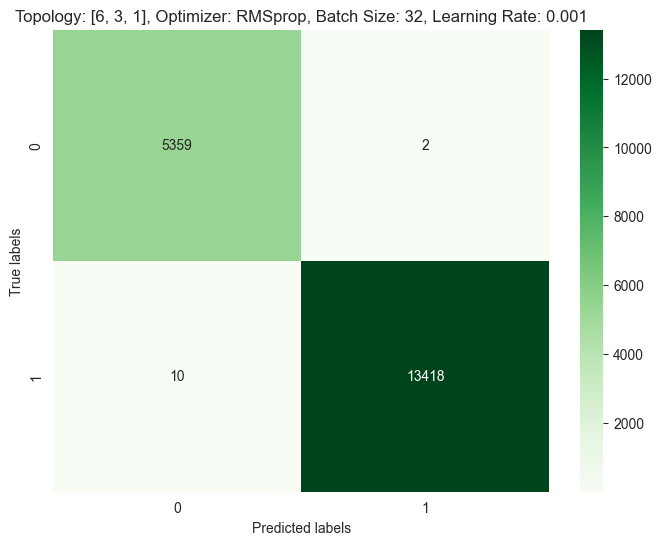

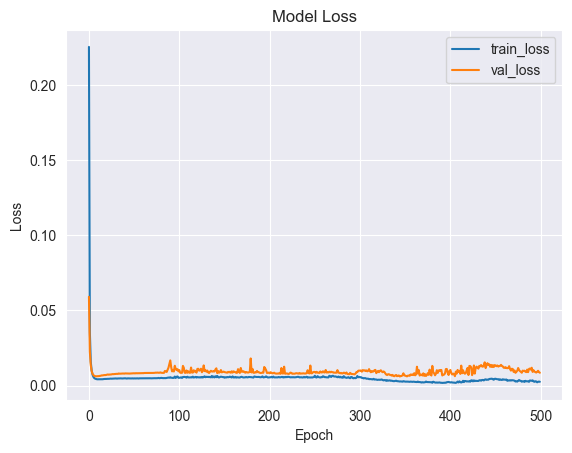

In [12]:
train_data = train_set.drop(columns=['Fire Alarm'])
train_labels = train_set['Fire Alarm']

test_data = test_set.drop(columns=['Fire Alarm'])
test_labels = test_set['Fire Alarm']

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

model = Sequential()
model.add(Dense(6, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Добавляем кастомный оптимайзер rmsprop с кастомным лернинг рейтом
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_scaled, train_labels, validation_data=(test_data_scaled, test_labels), epochs=500, batch_size=32,
                    verbose=0)

# Оценка модели на тестовом наборе
keras_predictions = (model.predict(test_data_scaled) > 0.5).astype(int)
keras_accuracy = accuracy_score(test_labels, keras_predictions)
keras_confusion = confusion_matrix(test_labels, keras_predictions)

print(f"Dokładność: {keras_accuracy*100:.5f} %")
print("Confusion Matrix RMSprop as optimizer:")
print(keras_confusion)
print('------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(keras_confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"Topology: [6, 3, 1], Optimizer: RMSprop, Batch Size: 32, Learning Rate: 0.001")
plt.show()

# Ретурн значение лосс с истории
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# График кривой ошибок
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

588/588 [==============================] - 1s 1ms/step
Dokładność: 99.98936 %
Confusion Matrix RMSprop as optimizer:
[[ 5361     0]
 [    2 13426]]
------------------------------------------


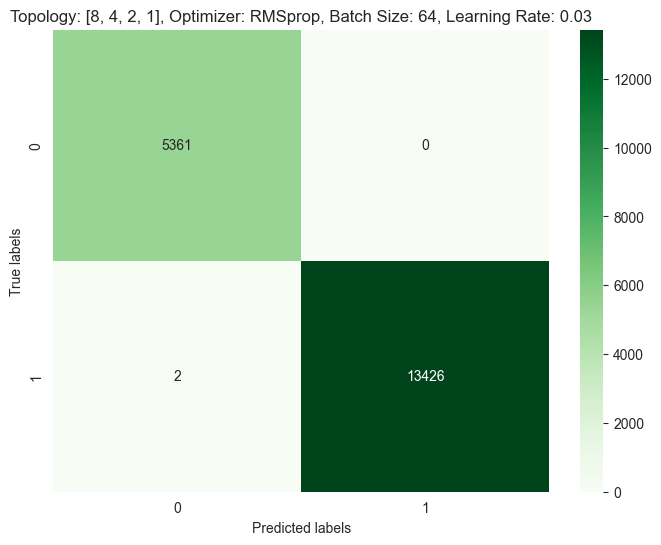

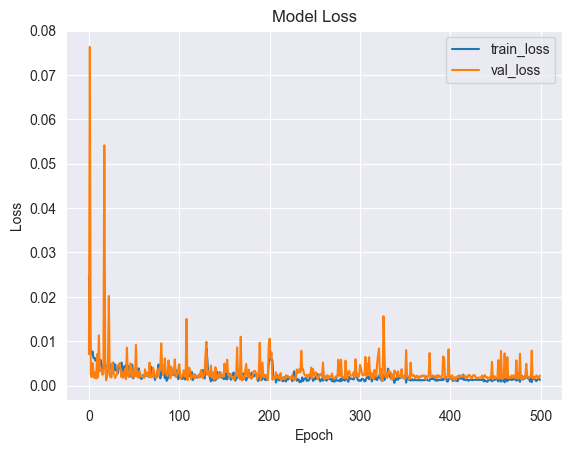

In [13]:
train_data = train_set.drop(columns=['Fire Alarm'])
train_labels = train_set['Fire Alarm']

test_data = test_set.drop(columns=['Fire Alarm'])
test_labels = test_set['Fire Alarm']

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

custom_learning_rate = 0.03
custom_rmsprop_optimizer = RMSprop(learning_rate=custom_learning_rate)

model = Sequential()
model.add(Dense(8, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Добавляем кастомный оптимайзер rmsprop с кастомным лернинг рейтом
model.compile(optimizer=custom_rmsprop_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_scaled, train_labels, validation_data=(test_data_scaled, test_labels), epochs=500, batch_size=64,
                    verbose=0)

# Оценка модели на тестовом наборе
keras_predictions = (model.predict(test_data_scaled) > 0.5).astype(int)
keras_accuracy = accuracy_score(test_labels, keras_predictions)
keras_confusion = confusion_matrix(test_labels, keras_predictions)

print(f"Dokładność: {keras_accuracy*100:.5f} %")
print("Confusion Matrix RMSprop as optimizer:")
print(keras_confusion)
print('------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(keras_confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"Topology: [8, 4, 2, 1], Optimizer: RMSprop, Batch Size: 64, Learning Rate: 0.03")
plt.show()


# Ретурн значение лосс с истории
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# График кривой ошибок
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

588/588 [==============================] - 1s 1ms/step
Dokładność: 99.97871 %
Confusion Matrix Adam as optimizer:
[[ 5360     1]
 [    3 13425]]
------------------------------------------


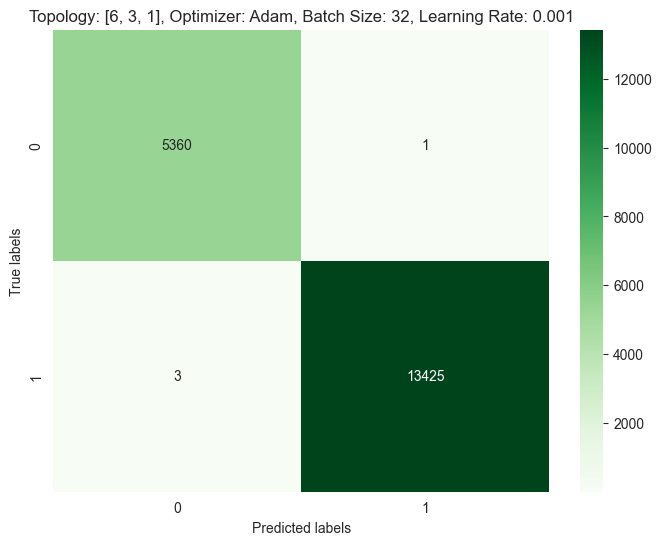

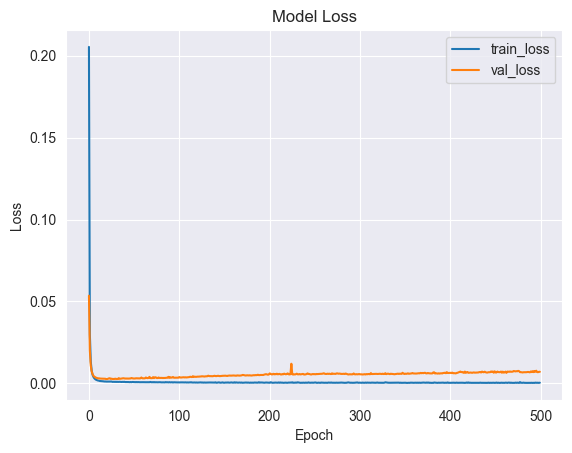

In [14]:
train_data = train_set.drop(columns=['Fire Alarm'])
train_labels = train_set['Fire Alarm']

test_data = test_set.drop(columns=['Fire Alarm'])
test_labels = test_set['Fire Alarm']

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

model = Sequential()
model.add(Dense(6, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Добавляем кастомный оптимайзер rmsprop с кастомным лернинг рейтом
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_scaled, train_labels, validation_data=(test_data_scaled, test_labels), epochs=500, batch_size=32,
                    verbose=0)

# Оценка модели на тестовом наборе
keras_predictions = (model.predict(test_data_scaled) > 0.5).astype(int)
keras_accuracy = accuracy_score(test_labels, keras_predictions)
keras_confusion = confusion_matrix(test_labels, keras_predictions)

print(f"Dokładność: {keras_accuracy*100:.5f} %")
print("Confusion Matrix Adam as optimizer:")
print(keras_confusion)
print('------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(keras_confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"Topology: [6, 3, 1], Optimizer: Adam, Batch Size: 32, Learning Rate: 0.001")
plt.show()

# Ретурн значение лосс с истории
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# График кривой ошибок
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

588/588 [==============================] - 1s 1ms/step
Dokładność: 98.24365 %
Confusion Matrix Adam as optimizer:
[[ 5360     1]
 [  329 13099]]
------------------------------------------


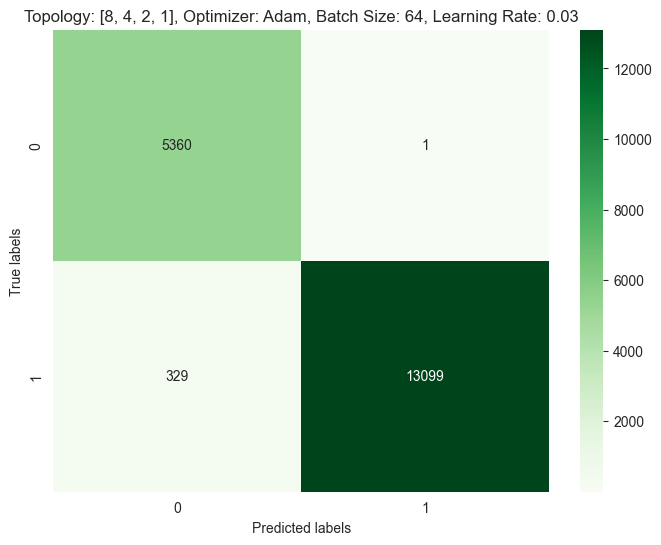

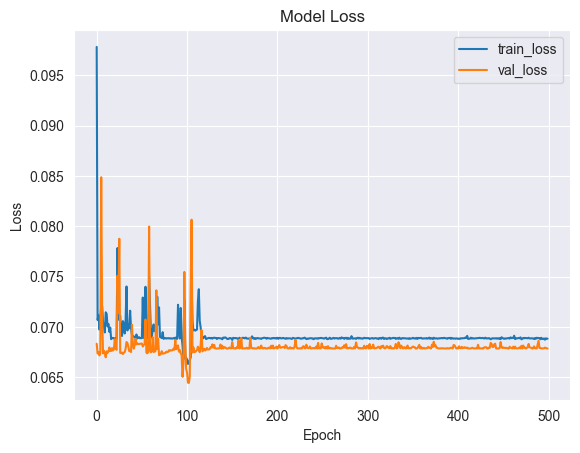

In [15]:
train_data = train_set.drop(columns=['Fire Alarm'])
train_labels = train_set['Fire Alarm']

test_data = test_set.drop(columns=['Fire Alarm'])
test_labels = test_set['Fire Alarm']

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data)
test_data_scaled = scaler.transform(test_data)

custom_learning_rate = 0.03
custom_adam_optimizer = Adam(learning_rate=custom_learning_rate)

model = Sequential()
model.add(Dense(8, input_dim=train_data_scaled.shape[1], activation='relu'))
model.add(Dense(4, activation='tanh'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Добавляем кастомный оптимайзер rmsprop с кастомным лернинг рейтом
model.compile(optimizer=custom_adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data_scaled, train_labels, validation_data=(test_data_scaled, test_labels), epochs=500, batch_size=64,
                    verbose=0)

# Оценка модели на тестовом наборе
keras_predictions = (model.predict(test_data_scaled) > 0.5).astype(int)
keras_accuracy = accuracy_score(test_labels, keras_predictions)
keras_confusion = confusion_matrix(test_labels, keras_predictions)

print(f"Dokładność: {keras_accuracy*100:.5f} %")
print("Confusion Matrix Adam as optimizer:")
print(keras_confusion)
print('------------------------------------------')

plt.figure(figsize=(8, 6))
sns.heatmap(keras_confusion, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title(f"Topology: [8, 4, 2, 1], Optimizer: Adam, Batch Size: 64, Learning Rate: 0.03")
plt.show()


# Ретурн значение лосс с истории
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# График кривой ошибок
plt.plot(train_loss, label='train_loss')
plt.plot(val_loss, label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()